###### Introduction to Network Analysis 2023/24 (vii)

## Community detection, blockmodeling & stochastic block models

Browse [CDlib](https://cdlib.readthedocs.io/en/latest/), [NetworkX](https://networkx.org/documentation/stable/reference/algorithms/community.html), [graph-tool](https://graph-tool.skewed.de/static/doc/demos/inference/inference.html) or other library for implementations of network community detection and graph partitioning algorithms. Select an algorithm which you will be using in the exercises below. For instance, select one of most popular algorithms such as hierarchical optimization of modularity known as Louvain algorithm, map equation algorithm called Infomap, simple label propagation algorithm, hierarchical clustering based on edge betweenness, Markov clustering algorithm, (degree-corrected) stochastic block model etc.

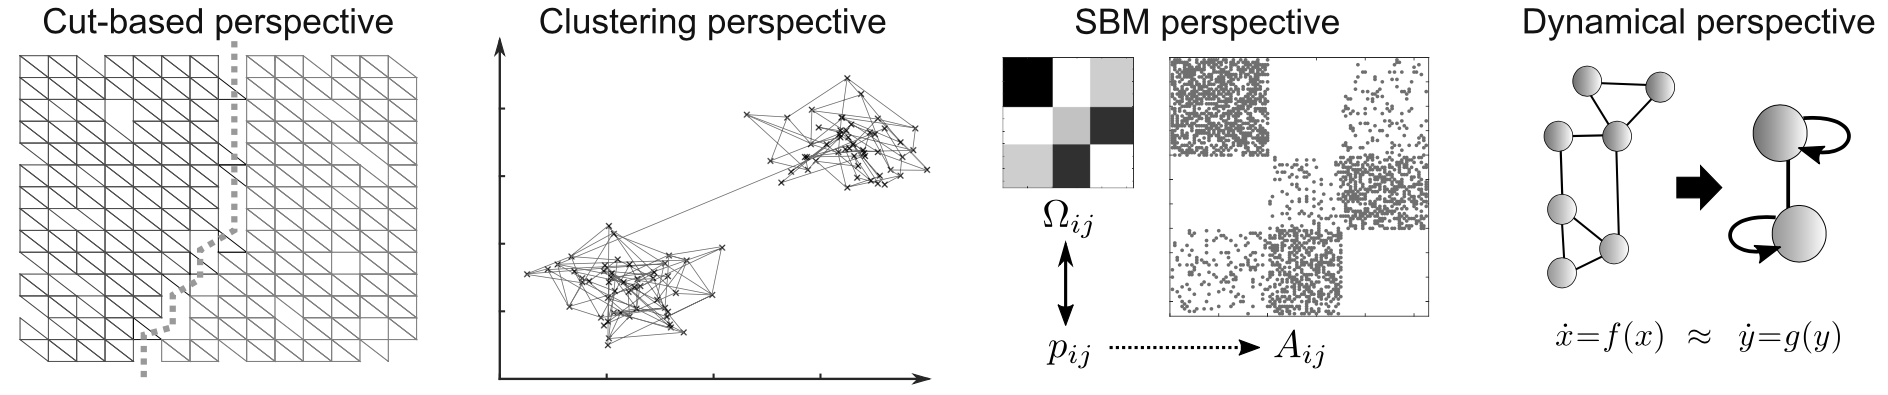

### I. Community detection in small social networks

You are given three small social networks with known sociological partitioning of nodes.

+ Zachary karate club network with 2 groups ([karate_club.net](http://lovro.fri.uni-lj.si/ina/nets/karate_club.net))
+ Lusseau bottlenose dolphins network with 2 groups ([dolphins.net](http://lovro.fri.uni-lj.si/ina/nets/dolphins.net))
+ US college football network with 12 conferences ([american_football.net](http://lovro.fri.uni-lj.si/ina/nets/american_football.net))



1. **(code)** Apply the algorithm to small social networks and test whether the revealed communities coincide with sociological partitioning of these networks. You should apply the algorithm to each network multiple times and compare partitions using some standard measure such as normalized mutual information or adjusted Rand index. Since these networks are very small, you can also print out or visualize the results.

In [1]:
pip install cdlib

In [2]:
import utils

soc_nets = [utils.read_pajek(name) for name in ["karate_club", "dolphins", "american_football"]]

In [5]:
from cdlib import algorithms, viz

# see https://cdlib.readthedocs.io/en/latest/reference/cd_algorithms/node_clustering.html
algs = {"Known": lambda G: utils.known_clustering(G), "Infomap": algorithms.infomap, "Louvain": algorithms.louvain,
        "LPA": algorithms.label_propagation, "FLPA": utils.fast_label_propagation, "EB": lambda G: algorithms.girvan_newman(G, level = 1)}
        # "MCL": algorithms.markov_clustering, "Leiden": algorithms.leiden

# NOTE: this wasn't properly tested, as cdlib is a nightmare to install.
for G in soc_nets:
  utils.info(G)
  utils.CD_comparison(G, algs, runs = 100)
  #viz.plot_network_clusters(G, algs["Known"](G), nx.spring_layout(G))
  #plt.show()

  MultiGraph | 'karate_club'
       Nodes | 34 (iso=0)
       Edges | 78 (loop=0)
      Degree | 4.59 (max=17)
         LCC | 100.0% (n=1)
  Clustering | 0.5706

   Algorithm | Count   Q      NMI    ARI    VI  
     'Known' |     2  0.371  1.000  1.000  0.000
   'Infomap' |     3  0.402  0.699  0.702  0.732
   'Louvain' |     4  0.415  0.631  0.514  1.061
       'LPA' |     3  0.325  0.445  0.473  1.299
      'FLPA' |     3  0.346  0.696  0.685  0.647
        'EB' |     2  0.360  0.836  0.882  0.325

  MultiGraph | 'dolphins'
       Nodes | 62 (iso=0)
       Edges | 159 (loop=0)
      Degree | 5.13 (max=12)
         LCC | 100.0% (n=1)
  Clustering | 0.2590

   Algorithm | Count   Q      NMI    ARI    VI  
     'Known' |     2  0.373  1.000  1.000  0.000
   'Infomap' |     6  0.524  0.554  0.354  1.423
   'Louvain' |     5  0.520  0.513  0.336  1.524
       'LPA' |     6  0.499  0.527  0.361  1.460
      'FLPA' |     4  0.476  0.629  0.516  1.050
        'EB' |     2  0.379  0.889  0.93

Results are:

|   Graph   | Nodes | Edges | Degree |  LCC   | Clustering |
| :-------: | :---: | :---: | :----: | :----: | :--------: |
| karate_club |  34 (0)  |  78 (0)  | 4.59 (17) | 100.0% (1) |   0.5706   |

<br>

|  Algorithm  | Count |   Q   |  NMI  |  ARI  |    VI    |
| :---------: | :---: | :---: | :---: | :---: | :------: |
|   'Known'   |   2   | 0.371 | 1.000 | 1.000 |  0.000   |
|  'Infomap'  |   3   | 0.402 | 0.699 | 0.702 |  0.732   |
|  'Louvain'  |   4   | 0.416 | 0.639 | 0.521 |  1.037   |
|  'Leiden'   |   4   | 0.420 | 0.687 | 0.541 |  0.908   |
|    'LPA'    |   3   | 0.325 | 0.445 | 0.473 |  1.299   |
|   'FLPA'    |   3   | 0.328 | 0.642 | 0.629 |  0.726   |
|    'MCL'    |   2   | 0.360 | 0.836 | 0.882 |  0.325   |
|     'EB'    |   2   | 0.360 | 0.836 | 0.882 |  0.325   |

<br>
<br>

|  Graph   | Nodes | Edges | Degree |  LCC   | Clustering |
| :------: | :---: | :---: | :----: | :----: | :--------: |
| dolphins | 62 (0) | 159 (0) | 5.13 (12) | 100.0% (1) |   0.2590   |

<br>

|  Algorithm  | Count |   Q   |  NMI  |  ARI  |    VI    |
| :---------: | :---: | :---: | :---: | :---: | :------: |
|   'Known'   |   2   | 0.373 | 1.000 | 1.000 |  0.000   |
|  'Infomap'  |   5   | 0.525 | 0.613 | 0.418 |  1.148   |
|  'Louvain'  |   5   | 0.521 | 0.517 | 0.337 |  1.514   |
|  'Leiden'   |   5   | 0.527 | 0.587 | 0.376 |  1.279   |
|    'LPA'    |   6   | 0.499 | 0.527 | 0.361 |  1.460   |
|   'FLPA'    |   4   | 0.479 | 0.617 | 0.496 |  1.075   |
|    'MCL'    |  12   | 0.455 | 0.448 | 0.205 |  2.233   |
|     'EB'    |   2   | 0.379 | 0.889 | 0.935 |  0.204   |

<br>
<br>

|    Graph    | Nodes | Edges | Degree |  LCC   | Clustering |
| :---------: | :---: | :---: | :----: | :----: | :--------: |
| american_football | 115 (0) | 616 (0) | 10.71 (13) | 100.0% (1) |   0.4032   |

<br>

|  Algorithm  | Count |   Q   |  NMI  |  ARI  |    VI    |
| :---------: | :---: | :---: | :---: | :---: | :------: |
|   'Known'   |   12  | 0.551 | 1.000 | 1.000 |  0.000   |
|  'Infomap'  |   10  | 0.601 | 0.892 | 0.817 |  0.737   |
|  'Louvain'  |   10  | 0.600 | 0.878 | 0.778 |  0.827   |
|  'Leiden'   |   10  | 0.601 | 0.890 | 0.807 |  0.749   |
|    'LPA'    |   10  | 0.580 | 0.840 | 0.672 |  1.079   |
|   'FLPA'    |   11  | 0.590 | 0.889 | 0.786 |  0.756   |
|    'MCL'    |   12  | 0.597 | 0.927 | 0.889 |  0.517   |
|     'EB'    |   2   | 0.396 | 0.359 | 0.140 |  2.912   |


For variation of information (*VI*), smaller is better. The algorithms seem to perform reasonably well on small networks, however many of them detect more than 2 groups in the `karate_club` network.